## 3.1. Installing Required Libraries

$pip install scikit-learn

$pip install numpy

$pip install pandas

$pip install matplotlib

$pip install seaborn


## 3.2. Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [2]:
import tensorflow as tf
print(tf.__version__)



2.3.0


## 3.3. Importing the Dataset

In [3]:
# https://www.kaggle.com/avikasliwal/used-cars-price-prediction?select=train-data.csv

data_path = r"/content/car_data.csv"
car_dataset = pd.read_csv(data_path, engine='python')
car_dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## 3.4. Data Visualization and Preprocessing

In [4]:
car_dataset.isnull().mean()

Unnamed: 0           0.000000
Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000332
Engine               0.005981
Power                0.005981
Seats                0.006978
New_Price            0.863100
Price                0.000000
dtype: float64

In [5]:
car_dataset = car_dataset.drop(['Unnamed: 0',  'New_Price'], axis = 1)

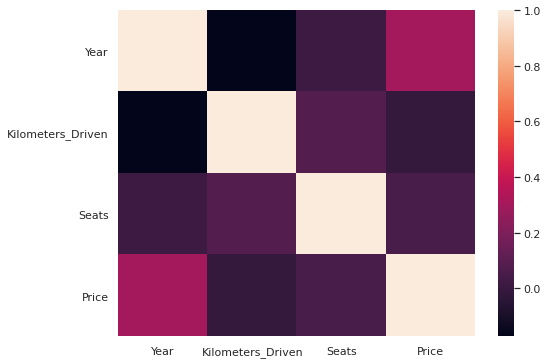

In [6]:
plt.rcParams["figure.figsize"] = [8 , 6]
sns.heatmap(car_dataset.corr())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


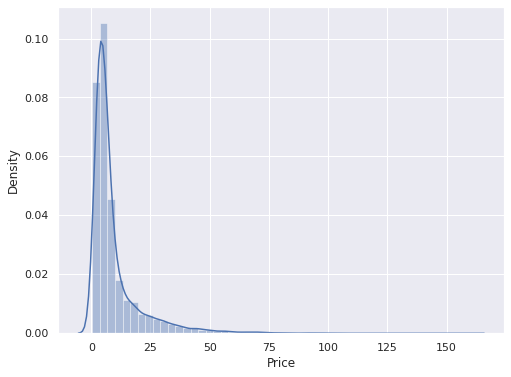

In [7]:
sns.distplot(car_dataset['Price'])

## 3.5. Converting Categorical Columns to Numerical

In [8]:
car_dataset.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

In [9]:
print(car_dataset.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object


In [10]:
numerical_data = car_dataset.drop(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage','Engine', 'Power'], axis=1)
numerical_data.head()

,Year,Kilometers_Driven,Seats,Price
0,2010,72000,5.0,1.75
1,2015,41000,5.0,12.50
2,2011,46000,5.0,4.50
3,2012,87000,7.0,6.00
4,2013,40670,5.0,17.74


In [11]:
categorical_data = car_dataset.filter(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage','Engine', 'Power'], axis=1)
categorical_data.head()

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
0,Mumbai,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp
1,Pune,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp
2,Chennai,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp
3,Chennai,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp
4,Coimbatore,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp


In [12]:
categorical_data__one_hot  = pd.get_dummies(categorical_data, drop_first= True)
categorical_data__one_hot.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Mileage_10.0 kmpl,Mileage_10.1 kmpl,Mileage_10.13 kmpl,Mileage_10.2 kmpl,Mileage_10.37 kmpl,Mileage_10.4 kmpl,Mileage_10.5 kmpl,Mileage_10.6 kmpl,Mileage_10.8 kmpl,Mileage_10.9 kmpl,Mileage_10.91 kmpl,Mileage_10.93 kmpl,Mileage_10.98 kmpl,Mileage_11.0 kmpl,Mileage_11.05 kmpl,Mileage_11.07 kmpl,Mileage_11.1 kmpl,Mileage_11.18 kmpl,Mileage_11.2 kmpl,Mileage_11.25 kmpl,Mileage_11.3 kmpl,Mileage_11.33 kmpl,...,Power_85.7 bhp,Power_85.8 bhp,Power_85.80 bhp,Power_86.7 bhp,Power_86.76 bhp,Power_86.79 bhp,Power_86.8 bhp,Power_87.2 bhp,Power_88 bhp,Power_88.2 bhp,Power_88.5 bhp,Power_88.50 bhp,Power_88.7 bhp,Power_88.73 bhp,Power_88.76 bhp,Power_88.8 bhp,Power_89.75 bhp,Power_89.84 bhp,Power_90 bhp,Power_91.1 bhp,Power_91.2 bhp,Power_91.7 bhp,Power_91.72 bhp,Power_92 bhp,Power_92.7 bhp,Power_93 bhp,Power_93.7 bhp,Power_94 bhp,Power_94.68 bhp,Power_95 bhp,Power_97.6 bhp,Power_97.7 bhp,Power_98.59 bhp,Power_98.6 bhp,Power_98.79 bhp,Power_98.82 bhp,Power_98.96 bhp,Power_99 bhp,Power_99.6 bhp,Power_null bhp
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
complete_dataset = pd.concat([numerical_data, categorical_data__one_hot ], axis=1)
complete_dataset.head()

,Year,Kilometers_Driven,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Mileage_10.0 kmpl,Mileage_10.1 kmpl,Mileage_10.13 kmpl,Mileage_10.2 kmpl,Mileage_10.37 kmpl,Mileage_10.4 kmpl,Mileage_10.5 kmpl,Mileage_10.6 kmpl,Mileage_10.8 kmpl,Mileage_10.9 kmpl,Mileage_10.91 kmpl,Mileage_10.93 kmpl,Mileage_10.98 kmpl,Mileage_11.0 kmpl,Mileage_11.05 kmpl,Mileage_11.07 kmpl,Mileage_11.1 kmpl,Mileage_11.18 kmpl,...,Power_85.7 bhp,Power_85.8 bhp,Power_85.80 bhp,Power_86.7 bhp,Power_86.76 bhp,Power_86.79 bhp,Power_86.8 bhp,Power_87.2 bhp,Power_88 bhp,Power_88.2 bhp,Power_88.5 bhp,Power_88.50 bhp,Power_88.7 bhp,Power_88.73 bhp,Power_88.76 bhp,Power_88.8 bhp,Power_89.75 bhp,Power_89.84 bhp,Power_90 bhp,Power_91.1 bhp,Power_91.2 bhp,Power_91.7 bhp,Power_91.72 bhp,Power_92 bhp,Power_92.7 bhp,Power_93 bhp,Power_93.7 bhp,Power_94 bhp,Power_94.68 bhp,Power_95 bhp,Power_97.6 bhp,Power_97.7 bhp,Power_98.59 bhp,Power_98.6 bhp,Power_98.79 bhp,Power_98.82 bhp,Power_98.96 bhp,Power_99 bhp,Power_99.6 bhp,Power_null bhp
0,2010,72000,5.0,1.75,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,41000,5.0,12.50,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,46000,5.0,4.50,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,87000,7.0,6.00,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,40670,5.0,17.74,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
complete_dataset.isnull().mean()

Year                  0.000000
Kilometers_Driven     0.000000
Seats                 0.006978
Price                 0.000000
Location_Bangalore    0.000000
                        ...   
Power_98.82 bhp       0.000000
Power_98.96 bhp       0.000000
Power_99 bhp          0.000000
Power_99.6 bhp        0.000000
Power_null bhp        0.000000
Length: 979, dtype: float64

In [16]:
complete_dataset.dropna(inplace = True)

## 3.6. Dividing Data Into Training and Test Sets

In [17]:
X = complete_dataset.drop(['Price'], axis=1)
y = complete_dataset['Price']

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3.7. Creating and Training Neural Network Model with TensorFlow Keras

In [20]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [21]:
input_layer = Input(shape=(X.shape[1],))
dense_layer0 = Dense(100, activation='relu')(input_layer)
dense_layer1 = Dense(50, activation='relu')(dense_layer0)
dense_layer2 = Dense(25, activation='relu')(dense_layer1)
dense_layer3 = Dense(10, activation='relu')(dense_layer2)
dense_layer4 = Dense(5, activation='relu')(dense_layer3)
dense_layer5 = Dense(2, activation='relu')(dense_layer4)
output = Dense(1)(dense_layer5)

In [22]:
model = Model(inputs = input_layer, outputs=output)
model.compile(loss="mean_absolute_error" , optimizer="adam", metrics=["mean_absolute_error"])

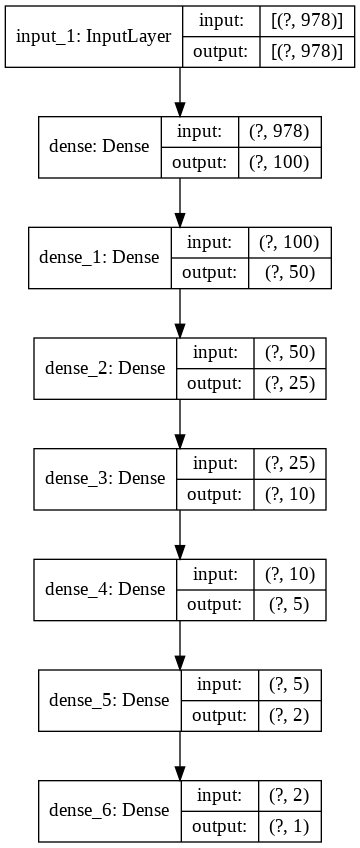

In [23]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [24]:
history = model.fit(X_train, y_train, batch_size=5, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
765/765 [==============================] - 2s 2ms/step - loss: 3.5883 - mean_absolute_error: 3.5883 - val_loss: 2.5825 - val_mean_absolute_error: 2.5825
Epoch 2/5
765/765 [==============================] - 1s 2ms/step - loss: 2.1662 - mean_absolute_error: 2.1662 - val_loss: 2.2323 - val_mean_absolute_error: 2.2323
Epoch 3/5
765/765 [==============================] - 1s 2ms/step - loss: 1.8443 - mean_absolute_error: 1.8443 - val_loss: 1.8604 - val_mean_absolute_error: 1.8604
Epoch 4/5
765/765 [==============================] - 1s 2ms/step - loss: 1.6240 - mean_absolute_error: 1.6240 - val_loss: 1.9125 - val_mean_absolute_error: 1.9125
Epoch 5/5
765/765 [==============================] - 1s 2ms/step - loss: 1.5245 - mean_absolute_error: 1.5245 - val_loss: 1.7685 - val_mean_absolute_error: 1.7685


## 3.8. Evaluating the Performance of a Neural Network Model

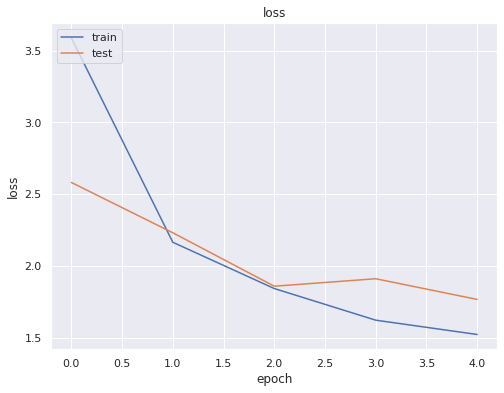

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [26]:
y_pred = model.predict(X_test)


In [27]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.869464170857018
Mean Squared Error: 22.80469457178821
Root Mean Squared Error: 4.775426114158632


In [28]:
car_dataset['Price'].mean()

9.479468350224273

In [33]:
comparison_df = pd.DataFrame({'Actual': y_test.values.tolist(), 'Predicted': y_pred.tolist()})  
comparison_df

,Actual,Predicted
0,8.25,[9.029337882995605]
1,5.08,[5.067000389099121]
2,4.50,[7.263372898101807]
3,28.50,[22.791542053222656]
4,7.25,[11.030244827270508]
...,...,...
1191,7.50,[6.18602991104126]
1192,21.67,[22.16016387939453]
1193,4.60,[5.486536502838135]
1194,8.00,[15.511911392211914]


## 3.9. Making Predictions on Single Data Point

In [36]:
X_test[1].shape

(978,)

In [38]:
single_point = X_test[1].reshape(1,-1)
single_point.shape

(1, 978)

In [40]:
model.predict(X_test[1].reshape(1,-1))

array([[5.0670004]], dtype=float32)

In [43]:
y_test.values[1]

5.08

## Exercise 3.1

**Question 1 :**

In a neural network with three input features, one hidden layer of 5 nodes and an output layer three possible values, what will be the dimensions of weight that connects input to hidden layer. Remember the dimensions of the input data is (m,3) where m is the number of records.

A.	[5,3]

B.	[3,5]

C.	[4,5]

D.	[5,4]

**Answer: B**


**Question 2:**

Which of the following loss function can you use in case of a regression problem problems:

A.	Sigmoid

B.	Negative log likelihood

C.	Mean Absolute Error

D.	Softmax

**Answer: C**

**Question 3:**

Neural networks with hidden layers are capable of finding:

A.	Linear Boundaries

B.	Non-linear Boundaries

C.	All of the above

D.	None of the Above

**Answer: C**


